In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../Data/heart_disease_uci.csv")  # Adjust the path if needed

# Display the first few rows
df.head()


,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
# Separate features and target variable
X = df.drop(columns=['chol'])  # Features
y = df['chol']  # Target

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Define preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),  # Scale numeric features
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Encode categorical features
])

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


# Separate features and target
X = df.drop(columns=['chol'])  # Features
y = df['chol']  # Target

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define preprocessing pipeline with an imputer
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
        ('scaler', StandardScaler())  # Scale numeric features
    ]), numerical_cols),
    ('cat', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill categorical NaNs with most common value
        ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical features
    ]), categorical_cols)
])

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Handle missing values in target variable
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_test.mean())

# Train ElasticNet model
model = ElasticNet(alpha=0.1, l1_ratio=0.5)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2}")
print(f"RMSE: {rmse}")


R² Score: 0.49689248722412616
RMSE: 77.10597393378997


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Define hyperparameter values to test
alphas = [0.01, 0.1, 1, 10]
l1_ratios = [0.1, 0.5, 0.9]
results = []

# Train ElasticNet for each combination of hyperparameters
for alpha in alphas:
    for l1_ratio in l1_ratios:
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        results.append((alpha, l1_ratio, r2, rmse))

# Convert results into DataFrame
df_results = pd.DataFrame(results, columns=['Alpha', 'L1 Ratio', 'R²', 'RMSE'])

# Print the full results table
print(df_results)

# Sort results by R² Score (descending)
df_results_sorted = df_results.sort_values(by="R²", ascending=False)
print("\n🔹 Top Hyperparameter Combinations (Sorted by R² Score):")
print(df_results_sorted)

# Select the best model
best_model = df_results_sorted.iloc[0]
print(f"\n✅ Best Hyperparameters → Alpha: {best_model['Alpha']}, L1 Ratio: {best_model['L1 Ratio']}")
print(f"Best R² Score: {best_model['R²']}")
print(f"Best RMSE: {best_model['RMSE']}")



    Alpha  L1 Ratio        R²        RMSE
0    0.01       0.1  0.524579   74.954330
1    0.01       0.5  0.525415   74.888413
2    0.01       0.9  0.525600   74.873837
3    0.10       0.1  0.463122   79.651799
4    0.10       0.5  0.496892   77.105974
5    0.10       0.9  0.525109   74.912590
6    1.00       0.1  0.210385   96.597382
7    1.00       0.5  0.273088   92.682650
8    1.00       0.9  0.447041   80.835868
9   10.00       0.1  0.037529  106.647665
10  10.00       0.5  0.045860  106.185143
11  10.00       0.9  0.107450  102.700834

🔹 Top Hyperparameter Combinations (Sorted by R² Score):
    Alpha  L1 Ratio        R²        RMSE
2    0.01       0.9  0.525600   74.873837
1    0.01       0.5  0.525415   74.888413
5    0.10       0.9  0.525109   74.912590
0    0.01       0.1  0.524579   74.954330
4    0.10       0.5  0.496892   77.105974
3    0.10       0.1  0.463122   79.651799
8    1.00       0.9  0.447041   80.835868
7    1.00       0.5  0.273088   92.682650
6    1.00       0.1

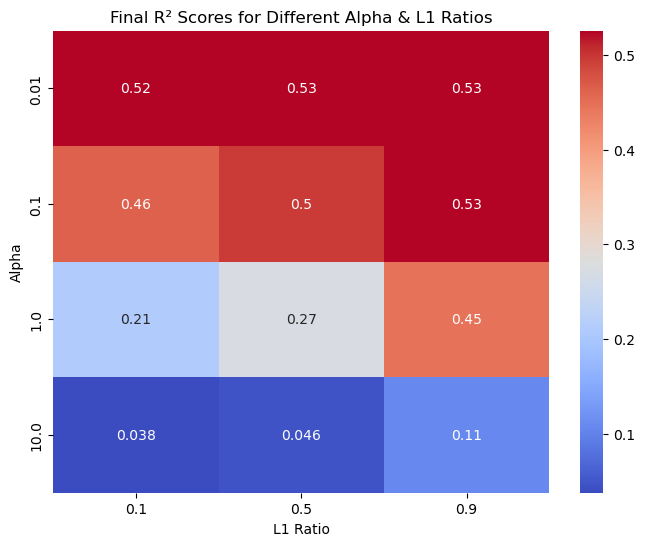

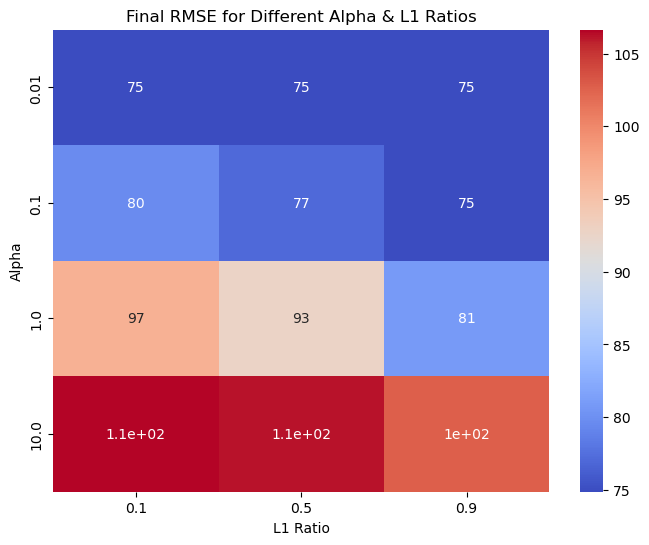

In [19]:
# Convert Alpha and L1 Ratio to string (safer for pivoting)
df_results['Alpha'] = df_results['Alpha'].astype(str)
df_results['L1 Ratio'] = df_results['L1 Ratio'].astype(str)

# Create pivot tables for heatmaps
r2_pivot = df_results.pivot(index="Alpha", columns="L1 Ratio", values="R²")
rmse_pivot = df_results.pivot(index="Alpha", columns="L1 Ratio", values="RMSE")

# Plot R² heatmap
plt.figure(figsize=(8,6))
sns.heatmap(r2_pivot, annot=True, cmap='coolwarm')
plt.title("Final R² Scores for Different Alpha & L1 Ratios")
plt.show()

# Plot RMSE heatmap
plt.figure(figsize=(8,6))
sns.heatmap(rmse_pivot, annot=True, cmap='coolwarm')
plt.title("Final RMSE for Different Alpha & L1 Ratios")
plt.show()



In [32]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Load dataset
df = pd.read_csv("../Data/heart_disease_uci.csv")

# Convert target variable to binary classification (0 = No Disease, 1 = Disease)
df['num'] = (df['num'] > 0).astype(int)  # Converts all 1, 2, 3, 4 into 1

# Define features (X) and target variable (y)
X = df.drop(columns=['num'])  # Features
y = df['num']  # Target (Binary: 0 = No Disease, 1 = Disease)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
        ('scaler', StandardScaler())  # Scale numeric features
    ]), numerical_cols),
    ('cat', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill categorical NaNs
        ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical features
    ]), categorical_cols)
])

# Split dataset into training and testing sets (Stratified to keep class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print("Data Preprocessing Complete! Target is now Binary (0 or 1)")



Data Preprocessing Complete! Target is now Binary (0 or 1)


In [30]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, average_precision_score

# Define hyperparameter combinations
penalties = ['l1', 'l2', 'elasticnet']
solvers = ['liblinear', 'saga']
results_logreg = []

# Train and evaluate Logistic Regression for different penalties & solvers
for penalty in penalties:
    for solver in solvers:
        if penalty == 'elasticnet' and solver != 'saga':  
            continue  # ElasticNet only works with saga solver

        # Add l1_ratio only when using elasticnet
        if penalty == 'elasticnet':
            model = LogisticRegression(penalty=penalty, solver=solver, l1_ratio=0.5, max_iter=5000)
        else:
            model = LogisticRegression(penalty=penalty, solver=solver, max_iter=5000)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='binary')  # Fixed error
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        auprc = average_precision_score(y_test, model.predict_proba(X_test)[:, 1])

        results_logreg.append((penalty, solver, accuracy, f1, roc_auc, auprc))

# Convert results into DataFrame
df_logreg_results = pd.DataFrame(results_logreg, columns=['Penalty', 'Solver', 'Accuracy', 'F1 Score', 'AUROC', 'AUPRC'])

# Print the full results table
print(" **All Tested Logistic Regression Models:**")
print(df_logreg_results)

# Sort results by AUROC Score (descending)
df_logreg_sorted = df_logreg_results.sort_values(by="AUROC", ascending=False)
print("\n **Top Logistic Regression Models (Sorted by AUROC):**")
print(df_logreg_sorted)

# Select and print the best model
best_logreg = df_logreg_sorted.iloc[0]
print("\n **Best Logistic Regression Model:**")
print(best_logreg)



 **All Tested Logistic Regression Models:**
      Penalty     Solver  Accuracy  F1 Score     AUROC     AUPRC
0          l1  liblinear  0.842391  0.862559  0.922406  0.918322
1          l1       saga  0.847826  0.866667  0.922406  0.918322
2          l2  liblinear  0.847826  0.867925  0.920732  0.914210
3          l2       saga  0.847826  0.867925  0.920732  0.914210
4  elasticnet       saga  0.847826  0.867925  0.922406  0.917588

 **Top Logistic Regression Models (Sorted by AUROC):**
      Penalty     Solver  Accuracy  F1 Score     AUROC     AUPRC
0          l1  liblinear  0.842391  0.862559  0.922406  0.918322
1          l1       saga  0.847826  0.866667  0.922406  0.918322
4  elasticnet       saga  0.847826  0.867925  0.922406  0.917588
2          l2  liblinear  0.847826  0.867925  0.920732  0.914210
3          l2       saga  0.847826  0.867925  0.920732  0.914210

 **Best Logistic Regression Model:**
Penalty            l1
Solver      liblinear
Accuracy     0.842391
F1 Score     0.8

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Define values for n_neighbors
neighbors = [1, 5, 10]
results_knn = []

# Train and evaluate k-NN for different values of n_neighbors
for n in neighbors:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='binary')  # Fixed error
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    auprc = average_precision_score(y_test, model.predict_proba(X_test)[:, 1])

    results_knn.append((n, accuracy, f1, roc_auc, auprc))

# Convert results into DataFrame
df_knn_results = pd.DataFrame(results_knn, columns=['n_neighbors', 'Accuracy', 'F1 Score', 'AUROC', 'AUPRC'])

# Print the results for all n_neighbors
print("\n k-NN Results for Different Values of n_neighbors:")
print(df_knn_results)

# Sort results and print the best configuration
df_knn_sorted = df_knn_results.sort_values(by="AUROC", ascending=False)
print("\n Sorted k-NN Results (Best at the Top):")
print(df_knn_sorted)

# Select and print the best model
best_knn = df_knn_sorted.iloc[0]
print("\n Best k-NN Model:")
print(best_knn)


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

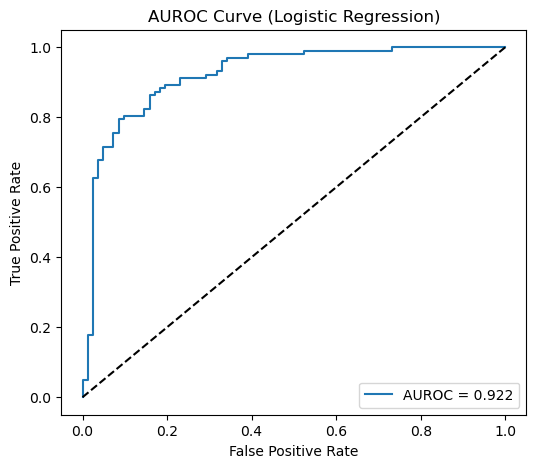

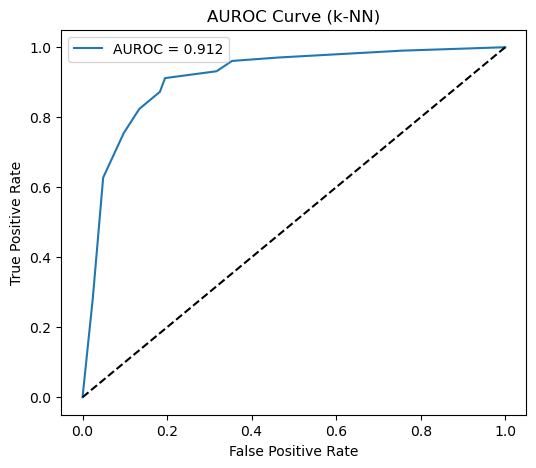

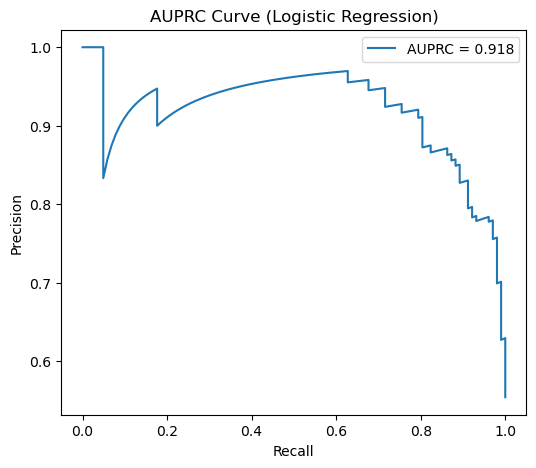

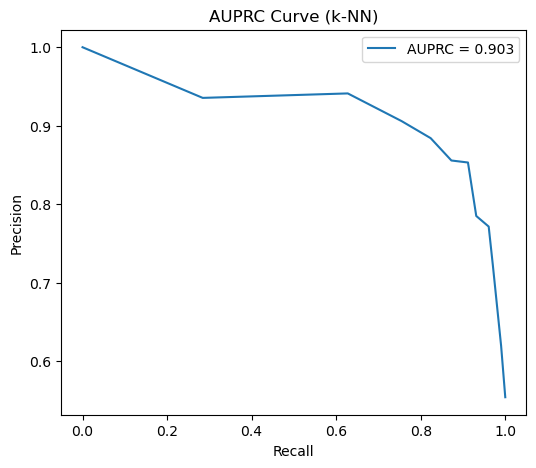

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve

# Function to plot AUROC
def plot_auroc(model, X_test, y_test, model_name):
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'AUROC = {auc_score:.3f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"AUROC Curve ({model_name})")
    plt.legend()
    plt.show()

# Function to plot AUPRC
def plot_auprc(model, X_test, y_test, model_name):
    y_probs = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    auprc_score = average_precision_score(y_test, y_probs)

    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, label=f'AUPRC = {auprc_score:.3f}')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"AUPRC Curve ({model_name})")
    plt.legend()
    plt.show()

# Train best models for visualization
best_logreg_model = LogisticRegression(penalty=best_logreg['Penalty'], solver=best_logreg['Solver']).fit(X_train, y_train)
best_knn_model = KNeighborsClassifier(n_neighbors=int(best_knn['n_neighbors'])).fit(X_train, y_train)

plot_auroc(best_logreg_model, X_test, y_test, "Logistic Regression")
plot_auroc(best_knn_model, X_test, y_test, "k-NN")

plot_auprc(best_logreg_model, X_test, y_test, "Logistic Regression")
plot_auprc(best_knn_model, X_test, y_test, "k-NN")
